In [224]:
import pandas as pd
import glob
import os
import pypfopt as pyp
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
import utils as u
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## Read in Data and create functions for data cleaning and standardization

In [3]:
x = pd.read_hdf('C:\\Users\\evank\\PycharmProjects\\RL_Virtu\\2022\\01\\20220103_prices.h5').set_index('time_utc')

In [19]:
x

,symbol,bidprice1,askprice1
time_utc,,,
2022-01-02 23:00:00.014215,EUR.USD.SPOT,1.13714,1.13781
2022-01-02 23:00:00.014267,EUR.USD.SPOT,1.13714,1.13780
2022-01-02 23:00:00.115289,EUR.USD.SPOT,1.13714,1.13800
2022-01-02 23:00:00.155221,EUR.USD.SPOT,1.13714,1.13787
2022-01-02 23:00:00.205117,EUR.USD.SPOT,1.13780,1.13787
...,...,...,...
2022-01-03 21:59:59.525095,EUR.USD.SPOT,1.12930,1.12995
2022-01-03 21:59:59.555021,AUD.USD.SPOT,0.71835,0.71970
2022-01-03 21:59:59.900067,NZD.USD.SPOT,0.67765,0.67915


In [22]:
pd.unique(x.symbol)

array(['EUR.USD.SPOT', 'USD.JPY.SPOT', 'USD.CAD.SPOT', 'AUD.USD.SPOT',
       'GBP.USD.SPOT', 'NZD.USD.SPOT', 'USD.MXN.SPOT', 'EUR.NOK.SPOT',
       'EUR.SEK.SPOT', 'USD.TRY.SPOT'], dtype=object)

In [109]:
def data_frame_by_freq(df: pd.DataFrame, freq: str):
    sym_list = list(pd.unique(df.symbol))
    asset_dict = {}
    for sym in sym_list:
        one_sym_df = df[df.symbol == sym]
        resamp = one_sym_df.resample(freq).last().drop(columns='symbol')
        asset_dict[sym] = resamp
    return pd.concat(asset_dict, axis=1).dropna(how='all').fillna(method='ffill')

In [4]:
data_frame_by_freq(x, '1Min')

EUR.USD.SPOT           USD.JPY.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.13756   1.13773      115.095   115.131   
2022-01-02 23:01:00      1.13764   1.13773      115.088   115.117   
2022-01-02 23:02:00      1.13775   1.13783      115.108   115.119   
2022-01-02 23:03:00      1.13782   1.13788      115.105   115.115   
2022-01-02 23:04:00      1.13785   1.13788      115.095   115.104   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00      1.12976   1.12981      115.349   115.355   
2022-01-03 21:56:00      1.12971   1.12976      115.348   115.355   
2022-01-03 21:57:00      1.12971   1.12977      115.348   115.355   
2022-01-03 21:58:00      1.12975   1.12981      115.320   115.334   
2022-01-03 21:59:00      1.12930   1.12995      115.300   115.365   

                    USD.CAD.SPOT           AUD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.26360   1.26402      0.72714   0.72729   
2022-01-02 23:01:00      1.26300   1.26338      0.72722   0.72740   
2022-01-02 23:02:00      1.26328   1.26343      0.72727   0.72740   
2022-01-02 23:03:00      1.26326   1.26345      0.72731   0.72740   
2022-01-02 23:04:00      1.26354   1.26376      0.72726   0.72739   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00      1.27453   1.27465      0.71901   0.71907   
2022-01-03 21:56:00      1.27453   1.27465      0.71902   0.71908   
2022-01-03 21:57:00      1.27455   1.27468      0.71902   0.71908   
2022-01-03 21:58:00      1.27441   1.27464      0.71908   0.71914   
2022-01-03 21:59:00      1.27415   1.27465      0.71835   0.71970   

                    GBP.USD.SPOT           NZD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.35314   1.35375      0.68160   0.68599   
2022-01-02 23:01:00      1.35324   1.35371      0.68346   0.68488   
2022-01-02 23:02:00      1.35312   1.35343      0.68399   0.68511   
2022-01-02 23:03:00      1.35305   1.35330      0.68424   0.68491   
2022-01-02 23:04:00      1.35302   1.35335      0.68439   0.68473   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00      1.34776   1.34794      0.67850   0.67861   
2022-01-03 21:56:00      1.34774   1.34789      0.67850   0.67861   
2022-01-03 21:57:00      1.34774   1.34789      0.67845   0.67856   
2022-01-03 21:58:00      1.34766   1.34783      0.67859   0.67872   
2022-01-03 21:59:00      1.34705   1.34900      0.67765   0.67910   

                    USD.MXN.SPOT           EUR.NOK.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00     20.48270  20.53560      10.0044   10.0349   
2022-01-02 23:01:00     20.48590  20.53190      10.0061   10.0334   
2022-01-02 23:02:00     20.49045  20.52964      10.0077   10.0282   
2022-01-02 23:03:00     20.49025  20.52906      10.0076   10.0281   
2022-01-02 23:04:00     20.49470  20.53026      10.0059   10.0281   
...                          ...       ...          ...       ...   
2022-01-03 21:55:00     20.49590  20.50080      10.0168   10.0260   
2022-01-03 21:56:00     20.50380  20.51240      10.0168   10.0260   
2022-01-03 21:57:00     20.50380  20.51240      10.0164   10.0266   
2022-01-03 21:58:00     20.49660  20.51050      10.0169   10.0267   
2022-01-03 21:59:00     20.49400  20.54900      10.0080   10.0420   

                    EUR.SEK.SPOT           USD.TRY.SPOT            
                       bidprice1 askprice1    bidprice1 askprice1  
time_utc        

In [123]:
def combine_files_freq(directory: str, ext: str, freq: str = None, last = False):
    path = directory
    df_list = []
    try:
        for folder in os.listdir(path):
            file_names = glob.glob(path +folder +'/*.' + ext)
            for file in file_names:
                try:
                    x = pd.read_hdf(file).set_index('time_utc')
                    if freq:
                        x = data_frame_by_freq(x, freq)
                    if last:
                        x = pd.DataFrame(x.iloc[-1,:]).transpose()
                    df_list.append(x)
                except:
                    print('File Failure: ' + file)
        full_df = pd.concat(df_list)
    except:
        file_names = glob.glob(path + '/*.' + ext)
        for file in file_names:
            try:
                x = pd.read_hdf(file).set_index('time_utc')
                if freq:
                    x = data_frame_by_freq(x, freq)
                if last:
                    x = pd.DataFrame(x.iloc[-1,:]).transpose()
                df_list.append(x)
            except:
                print('File Failure: ' + file)
        full_df = pd.concat(df_list)
    return full_df

In [36]:
train_df = combine_files_freq('C:/Users/evank/PycharmProjects/RL_Virtu/train/', 'h5', '1Min')

Failure: C:/Users/evank/PycharmProjects/RL_Virtu/train/02\20220228_prices.h5


In [37]:
train_df

EUR.USD.SPOT           USD.JPY.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.13756   1.13773      115.095   115.131   
2022-01-02 23:01:00      1.13764   1.13773      115.088   115.117   
2022-01-02 23:02:00      1.13775   1.13783      115.108   115.119   
2022-01-02 23:03:00      1.13782   1.13788      115.105   115.115   
2022-01-02 23:04:00      1.13785   1.13788      115.095   115.104   
...                          ...       ...          ...       ...   
2022-04-29 20:55:00      1.05453   1.05459      129.861   129.869   
2022-04-29 20:56:00      1.05420   1.05469      129.851   129.859   
2022-04-29 20:57:00      1.05425   1.05469      129.849   129.856   
2022-04-29 20:58:00      1.05420   1.05479      129.815   129.893   
2022-04-29 20:59:00      1.05360   1.05480      129.815   129.915   

                    USD.CAD.SPOT           AUD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.26360   1.26402      0.72714   0.72729   
2022-01-02 23:01:00      1.26300   1.26338      0.72722   0.72740   
2022-01-02 23:02:00      1.26328   1.26343      0.72727   0.72740   
2022-01-02 23:03:00      1.26326   1.26345      0.72731   0.72740   
2022-01-02 23:04:00      1.26354   1.26376      0.72726   0.72739   
...                          ...       ...          ...       ...   
2022-04-29 20:55:00      1.28580   1.28590      0.70603   0.70609   
2022-04-29 20:56:00      1.28580   1.28605      0.70595   0.70600   
2022-04-29 20:57:00      1.28570   1.28579      0.70594   0.70643   
2022-04-29 20:58:00      1.28570   1.28607      0.70605   0.70625   
2022-04-29 20:59:00      1.28230   1.28620      0.70575   0.70695   

                    GBP.USD.SPOT           NZD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00      1.35314   1.35375      0.68160   0.68599   
2022-01-02 23:01:00      1.35324   1.35371      0.68346   0.68488   
2022-01-02 23:02:00      1.35312   1.35343      0.68399   0.68511   
2022-01-02 23:03:00      1.35305   1.35330      0.68424   0.68491   
2022-01-02 23:04:00      1.35302   1.35335      0.68439   0.68473   
...                          ...       ...          ...       ...   
2022-04-29 20:55:00      1.25746   1.25757      0.64575   0.64585   
2022-04-29 20:56:00      1.25748   1.25786      0.64576   0.64586   
2022-04-29 20:57:00      1.25722   1.25786      0.64569   0.64578   
2022-04-29 20:58:00      1.25732   1.25786      0.64558   0.64568   
2022-04-29 20:59:00      1.25615   1.25790      0.64505   0.64580   

                    USD.MXN.SPOT           EUR.NOK.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
time_utc                                                            
2022-01-02 23:00:00     20.48270  20.53560      10.0044   10.0349   
2022-01-02 23:01:00     20.48590  20.53190      10.0061   10.0334   
2022-01-02 23:02:00     20.49045  20.52964      10.0077   10.0282   
2022-01-02 23:03:00     20.49025  20.52906      10.0076   10.0281   
2022-01-02 23:04:00     20.49470  20.53026      10.0059   10.0281   
...                          ...       ...          ...       ...   
2022-04-29 20:55:00     20.42430  20.42850       9.8874    9.8936   
2022-04-29 20:56:00     20.42500  20.43000       9.8874    9.8936   
2022-04-29 20:57:00     20.42300  20.43160       9.8874    9.8936   
2022-04-29 20:58:00     20.42200  20.43160       9.8874    9.8936   
2022-04-29 20:59:00     20.40400  20.44100       9.8855    9.9035   

                    EUR.SEK.SPOT           USD.TRY.SPOT            
                       bidprice1 askprice1    bidprice1 askprice1  
time_utc        

In [47]:
def mid_price_df(multi_df):
    subcols = multi_df.columns.get_level_values(1).unique()
    new_df = []
    for col in multi_df.columns.get_level_values(0).unique():
        mid = pd.DataFrame((multi_df[(col, subcols[0])] + multi_df[(col, subcols[1])])/2)
        mid.columns = [col]
        new_df.append(mid)
    return pd.concat(new_df, axis=1)

In [142]:
mid = mid_price_df(train_df)
mid

,EUR.USD.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,AUD.USD.SPOT,GBP.USD.SPOT,NZD.USD.SPOT,USD.MXN.SPOT,EUR.NOK.SPOT,EUR.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,1.137645,115.1130,1.263810,0.727215,1.353445,0.683795,20.509150,10.01965,10.29310,NaN
2022-01-02 23:01:00,1.137685,115.1025,1.263190,0.727310,1.353475,0.684170,20.508900,10.01975,10.29470,NaN
2022-01-02 23:02:00,1.137790,115.1135,1.263355,0.727335,1.353275,0.684550,20.510045,10.01795,10.29495,NaN
2022-01-02 23:03:00,1.137850,115.1100,1.263355,0.727355,1.353175,0.684575,20.509655,10.01785,10.29540,NaN
2022-01-02 23:04:00,1.137865,115.0995,1.263650,0.727325,1.353185,0.684560,20.512480,10.01700,10.29370,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 20:55:00,1.054560,129.8650,1.285850,0.706060,1.257515,0.645800,20.426400,9.89050,10.35735,NaN
2022-04-29 20:56:00,1.054445,129.8550,1.285925,0.705975,1.257670,0.645810,20.427500,9.89050,10.35720,NaN
2022-04-29 20:57:00,1.054470,129.8525,1.285745,0.706185,1.257540,0.645735,20.427300,9.89050,10.35615,NaN


In [145]:
def df_to_usd(df):
    cols = df.columns.get_level_values(0).unique()
    cols_list = []
    new_df = pd.DataFrame()
    for col in cols:
        if col[4:7] == 'USD':
            new_df[col] = 1/df[col]
            col = 'USD.' + col[:3] + '.SPOT'
        elif col[:3] == 'EUR':
            try:
                new_df[col] = df[col] * df['USD.EUR.SPOT']
            except:
                new_df[col] = df[col] / df['EUR.USD.SPOT']
            col = 'USD.' + col[4:7] + '.SPOT'
        else:
            new_df[col] = df[col]
        cols_list.append(col)
    new_df.columns = cols_list
    new_df = new_df.sort_index()
    return new_df

In [146]:
df_usd = df_to_usd(mid)
df_usd

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,0.879009,115.1130,1.263810,1.375109,0.738855,1.462427,20.509150,8.807361,9.047726,NaN
2022-01-02 23:01:00,0.878978,115.1025,1.263190,1.374930,0.738839,1.461625,20.508900,8.807139,9.048814,NaN
2022-01-02 23:02:00,0.878897,115.1135,1.263355,1.374882,0.738948,1.460814,20.510045,8.804744,9.048199,NaN
2022-01-02 23:03:00,0.878850,115.1100,1.263355,1.374844,0.739003,1.460760,20.509655,8.804192,9.048117,NaN
2022-01-02 23:04:00,0.878839,115.0995,1.263650,1.374901,0.738997,1.460792,20.512480,8.803329,9.046504,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 20:55:00,0.948263,129.8650,1.285850,1.416310,0.795219,1.548467,20.426400,9.378793,9.821490,NaN
2022-04-29 20:56:00,0.948366,129.8550,1.285925,1.416481,0.795121,1.548443,20.427500,9.379816,9.822418,NaN
2022-04-29 20:57:00,0.948344,129.8525,1.285745,1.416060,0.795203,1.548623,20.427300,9.379594,9.821190,NaN


In [54]:
minute_df = combine_files_freq('C:/Users/evank/PycharmProjects/RL_Virtu/2022/', 'h5', '1Min')

Failure: C:/Users/evank/PycharmProjects/RL_Virtu/2022/02\20220228_prices.h5


In [75]:
minute_df.dropna(how='all').to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/minute_data_bid_ask.csv')

In [147]:
minute_df_mid_usd = df_to_usd(mid_price_df(minute_df))

In [148]:
minute_df_mid_usd.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/minute_data_mid_usd.csv')

In [149]:
#get daily as last point in each file
daily_df = combine_files_freq('C:/Users/evank/PycharmProjects/RL_Virtu/2022/01/', 'h5', '1h', last=True)
daily_df = daily_df.fillna(method='ffill')
daily_df

EUR.USD.SPOT           USD.JPY.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
2022-01-03 21:00:00      1.12930   1.12995      115.300   115.365   
2022-01-04 21:00:00      1.12865   1.12880      116.125   116.190   
2022-01-05 21:00:00      1.13111   1.13174      116.088   116.155   
2022-01-06 21:00:00      1.12891   1.13005      115.800   115.850   
2022-01-07 21:00:00      1.13585   1.13630      115.515   115.605   
2022-01-10 21:00:00      1.13205   1.13290      115.150   115.255   
2022-01-11 21:00:00      1.13620   1.13695      115.285   115.300   
2022-01-12 21:00:00      1.14405   1.14450      114.630   114.640   
2022-01-13 21:00:00      1.14540   1.14555      114.160   114.237   
2022-01-14 21:00:00      1.14020   1.14170      114.190   114.300   
2022-01-18 21:00:00      1.13212   1.13285      114.585   114.650   
2022-01-19 21:00:00      1.13417   1.13433      114.320   114.340   
2022-01-20 21:00:00      1.13090   1.13140      114.070   114.080   
2022-01-21 21:00:00      1.13390   1.13485      113.650   113.710   
2022-01-24 21:00:00      1.13220   1.13295      113.882   113.995   
2022-01-25 21:00:00      1.12990   1.13030      113.845   113.875   
2022-01-26 21:00:00      1.12355   1.12425      114.604   114.695   
2022-01-27 21:00:00      1.11400   1.11515      115.360   115.375   
2022-01-28 21:00:00      1.11410   1.11575      115.180   115.260   
2022-01-31 21:00:00      1.12320   1.12415      115.074   115.160   

                    USD.CAD.SPOT           AUD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
2022-01-03 21:00:00      1.27415   1.27465      0.71835   0.71970   
2022-01-04 21:00:00      1.27015   1.27175      0.72305   0.72425   
2022-01-05 21:00:00      1.27540   1.27585      0.72190   0.72225   
2022-01-06 21:00:00      1.27250   1.27355      0.71600   0.71645   
2022-01-07 21:00:00      1.26355   1.26485      0.71785   0.71825   
2022-01-10 21:00:00      1.26730   1.26895      0.71550   0.71760   
2022-01-11 21:00:00      1.25715   1.25795      0.72095   0.72110   
2022-01-12 21:00:00      1.25055   1.25135      0.72835   0.72860   
2022-01-13 21:00:00      1.25185   1.25230      0.72805   0.72905   
2022-01-14 21:00:00      1.25475   1.25615      0.71955   0.72175   
2022-01-18 21:00:00      1.25105   1.25160      0.71825   0.71865   
2022-01-19 21:00:00      1.25135   1.25160      0.72100   0.72125   
2022-01-20 21:00:00      1.24995   1.25055      0.72240   0.72285   
2022-01-21 21:00:00      1.25715   1.25885      0.71705   0.71955   
2022-01-24 21:00:00      1.26335   1.26445      0.71405   0.71490   
2022-01-25 21:00:00      1.26205   1.26335      0.71405   0.71555   
2022-01-26 21:00:00      1.26650   1.26775      0.71135   0.71175   
2022-01-27 21:00:00      1.27390   1.27455      0.70310   0.70355   
2022-01-28 21:00:00      1.27615   1.27720      0.69765   0.70015   
2022-01-31 21:00:00      1.27005   1.27145      0.70630   0.70710   

                    GBP.USD.SPOT           NZD.USD.SPOT            \
                       bidprice1 askprice1    bidprice1 askprice1   
2022-01-03 21:00:00      1.34705   1.34900      0.67765   0.67910   
2022-01-04 21:00:00      1.35205   1.35400      0.67600   0.68625   
2022-01-05 21:00:00      1.35475   1.35625      0.67905   0.67995   
2022-01-06 21:00:00      1.35245   1.35375      0.67425   0.67525   
2022-01-07 21:00:00      1.35765   1.35975      0.67705   0.67885   
2022-01-10 21:00:00      1.35725   1.35790      0.67525   0.67665   
2022-01-11 21:00:00      1.36335   1.36375      0.67840   0.67880   
2022-01-12 21:00:00      1.36925   1.37075      0.68445   0.68595   
2022-01-13 21:00:00      1.37005   1.37100      0.68555   0.68675   
2022-01-14 21:00:00      1.36525   1.36850      0.67895   0.68155   
2022-01-18 21:00:00      1.35910   1.35980      0.67660   0.67785   
2022-01-19 21:00:00      1.36100   1.36145      0.67795   0.67915   
2022-01-20 21:00

In [150]:
daily_df_mid_usd = df_to_usd(mid_price_df(daily_df))
daily_df_mid_usd.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/daily_data_mid_usd.csv')
daily_df.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/daily_data_bid_ask.csv')

In [151]:
hour_df_mid_usd = minute_df_mid_usd.resample('1h').last().dropna(how='all').fillna(method='ffill')
hour_df_mid_usd.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/hour_data_mid_usd.csv')

In [152]:
hour_df = minute_df.resample('1h').last().dropna(how='all').fillna(method='ffill')
hour_df.to_csv('C:/Users/evank/PycharmProjects/RL_Virtu/cleaned_data/hour_data_bid_ask.csv')

## Now to use Markowitz Portfolio Optimization

In [153]:
hour_df_usd_price = 1/hour_df_mid_usd
hour_df_usd_price

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,1.137285,0.008685,0.789905,0.726765,1.352165,0.683940,0.048806,0.113678,0.110537,0.074296
2022-01-03 00:00:00,1.136200,0.008674,0.790270,0.726565,1.351730,0.684755,0.048807,0.113556,0.110415,0.074487
2022-01-03 01:00:00,1.135855,0.008680,0.789752,0.725570,1.351770,0.683800,0.048767,0.113435,0.110544,0.074628
2022-01-03 02:00:00,1.134265,0.008675,0.789067,0.725225,1.350455,0.683225,0.048719,0.113175,0.110395,0.074548
2022-01-03 03:00:00,1.134830,0.008675,0.788731,0.724870,1.349960,0.683130,0.048704,0.113228,0.110446,0.074419
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 16:00:00,1.048275,0.007371,0.776895,0.691200,1.217700,0.625075,0.049798,0.101629,0.097871,0.059887
2022-06-30 17:00:00,1.048025,0.007371,0.777348,0.691075,1.217725,0.624825,0.049824,0.101612,0.097855,0.059827
2022-06-30 18:00:00,1.048075,0.007377,0.777016,0.690725,1.218250,0.624675,0.049676,0.101508,0.097750,0.059848


In [154]:
def markowitz_rebalance(securities_vector, rebalance_period,prior_period, obj ='minvar', verbose=True,weight_bounds=(0,1)):
    i = 1
    i_ = round((len(securities_vector)-prior_period)/rebalance_period)
    weights_list=[]
    dates=[]
    for p in range(0,len(securities_vector)-prior_period,rebalance_period):

        prior_vector = securities_vector[p:prior_period+p]

        if verbose:
            print("Iteration " + str(i) + " of " + str(i_))
            print(str(prior_vector.index[0]) + " - " + str(prior_vector.index[-1]))


        mu = pyp.expected_returns.mean_historical_return(prior_vector)
        S = pyp.risk_models.CovarianceShrinkage(prior_vector).ledoit_wolf()
        ef = pyp.efficient_frontier.EfficientFrontier(mu, S,weight_bounds=weight_bounds)
        if obj == 'minvar':
            weights =  ef.min_volatility()
        if obj =='sharpe':
            weights = ef.max_sharpe()
        cleaned_weights = ef.clean_weights()
        weights_list.append(cleaned_weights)
        dates.append(prior_vector.index[-1])
        i+=1
    weight_df=pd.DataFrame(weights_list)
    weight_df.index=dates

    return weight_df


In [155]:
hour_df_usd_price_tr = hour_df_usd_price.loc[:'04-29-2022']

In [156]:
hour_df_usd_price_tr

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_utc,,,,,,,,,,
2022-01-02 23:00:00,1.137285,0.008685,0.789905,0.726765,1.352165,0.683940,0.048806,0.113678,0.110537,0.074296
2022-01-03 00:00:00,1.136200,0.008674,0.790270,0.726565,1.351730,0.684755,0.048807,0.113556,0.110415,0.074487
2022-01-03 01:00:00,1.135855,0.008680,0.789752,0.725570,1.351770,0.683800,0.048767,0.113435,0.110544,0.074628
2022-01-03 02:00:00,1.134265,0.008675,0.789067,0.725225,1.350455,0.683225,0.048719,0.113175,0.110395,0.074548
2022-01-03 03:00:00,1.134830,0.008675,0.788731,0.724870,1.349960,0.683130,0.048704,0.113228,0.110446,0.074419
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 16:00:00,1.054930,0.007712,0.780250,0.708395,1.257800,0.646070,0.049083,0.106964,0.102035,0.067330
2022-04-29 17:00:00,1.057270,0.007722,0.780640,0.709830,1.260535,0.647485,0.049114,0.107121,0.102357,0.067330
2022-04-29 18:00:00,1.057000,0.007725,0.779262,0.708130,1.259880,0.646800,0.049147,0.106984,0.102203,0.067455


In [201]:
rebal_freqs = np.arange(1,23)
lookbacks = np.arange(len(hour_df_usd_price.columns)+1,23*20,10)
portfolios = []
i=0
for r in rebal_freqs:
    for l in lookbacks:
        if l >= r:
            i+=1
            new_port = markowitz_rebalance(hour_df_usd_price_tr,r,l,verbose=False)
            portfolios.append(new_port)
            if i%10==0:
                print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970


In [202]:
pair_list = []
for r in rebal_freqs:
    for l in lookbacks:
        if l >= r:
            pair_list.append(str(r) +' '+ str(l))

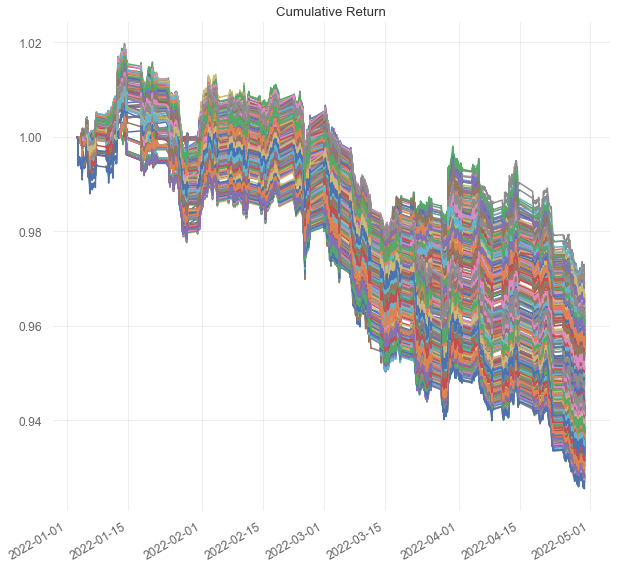

In [203]:
ret_list = []
for p in range(len(portfolios)):
    ret_list.append(u.backtest.portfolio_backtest(portfolios[p],hour_df_usd_price_tr).iloc[-1])
    #print(pair_list[p])

In [211]:
best = ret_list.index(max(ret_list))
print(best)

47


In [208]:
print(pair_list[best])
print(ret_list[best])

2 31
0.9707949877321397


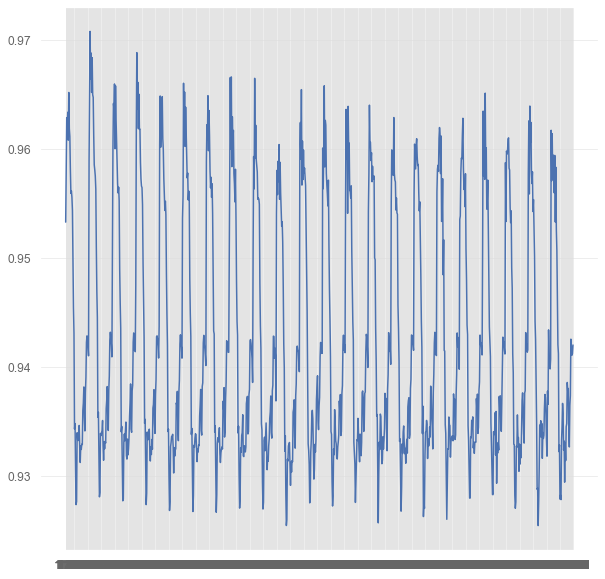

In [209]:
plt.plot(pair_list,ret_list)

                           Strategy
-------------------------  ----------
Start Period               2022-01-04
End Period                 2022-04-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -2.92%
CAGR﹪                     -8.98%

Sharpe                     -0.38
Smart Sharpe               -0.36
Sortino                    -0.55
Smart Sortino              -0.51
Sortino/√2                 -0.39
Smart Sortino/√2           -0.36
Omega                      0.93

Max Drawdown               -4.87%
Longest DD Days            105
Volatility (ann.)          1.06%
Calmar                     -1.84
Skew                       0.49
Kurtosis                   6.69

Expected Daily %           -0.0%
Expected Monthly %         -0.74%
Expected Yearly %          -2.92%
Kelly Criterion            -3.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.11%
Expected Shortfall (cVaR)  -0.11%

Gain/Pain Ratio            -0.25
Gain/Pain (1M)     

2022-01-04 06:00:00    1.000000
2022-01-04 07:00:00    1.000730
2022-01-04 08:00:00    1.000140
2022-01-04 09:00:00    1.000678
2022-01-04 10:00:00    1.000046
                         ...   
2022-04-29 16:00:00    0.971662
2022-04-29 17:00:00    0.972417
2022-04-29 18:00:00    0.972998
2022-04-29 19:00:00    0.971092
2022-04-29 20:00:00    0.970795
Length: 1833, dtype: float64

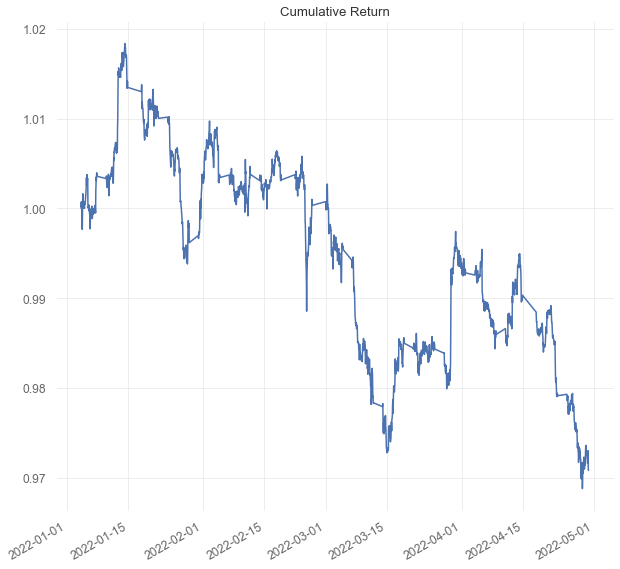

In [225]:
u.backtest.portfolio_backtest(portfolios[47],hour_df_usd_price_tr,tearsheet=True, mode='full')